# **CLASSIFICAÇÃO DE ARRITMIAS CARDÍACAS ATRAVÉS DE MODELOS DE MACHINE LEARNING: UM ESTUDO DE CIÊNCIA DE DADOS**

Raquel Colares Santos



## Sumário



1.   Introdução
2.   Coleta de Dados
3.   Processamento e Tratamento de Dados
4.   Análise e Exploração dos Dados
5.   Modelos de Machine Learning
6.   Interpretação dos Resultados
7.   Apresentação dos Resultados



## 1 - Introdução

As doenças cardíacas são a principal causa de mortes no mundo hoje, estando em primeiro lugar no ranking segundo a Organização Mundial da Saúde (OMS). As doenças cardíacas, entre elas a arritmia, por estarem entre a principal causa de mortes no mundo, é importante para a sociedade que haja um avanço da medicina para o diagnóstico e tratamento da doença, em prol da diminuição das mortes.

As arritmias são sequências de batimentos cardíacos irregulares, muito rápidos ou lentos, que oscilam em diferentes ritmos, que percorrem o coração por vias anormais de condução elétrica.

O objetivo deste projeto é analisar os dados de diferentes bases de dados públicas sobre Arritmia, e também, desenvolver modelos de Machine Learning para análise da acurácia e precisão dos modelos na classificação de pacientes com a doença.

<p align="center"><img src="https://raw.githubusercontent.com/raquelcolares/TCC_PUC-Minas/main/Images/cardio_pic1.webp" width="400"></p>

## 2 - Coleta de Dados

Primeiramente foram importadas todas as bibliotecas que serão utilizadas neste trabalho e também demais instalações que serão necessárias.

In [2]:
# Instalando a ferramenta de visualização SHAP
!pip install shap

In [3]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report

import shap
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Primeiro Dataset

O primeiro dataset é do St. Petersburg Institute of Cardiological Technics (INCART) e contém 175729 registros.

A fonte dos dados e todas as referências utilizadas se encontram no documento em PDF do TCC.

In [4]:
# Importando os dados do primeiro dataset
df1 = pd.read_csv('/content/INCART 2-lead Arrhythmia Database.csv')

In [5]:
# Visualizando as cinco primeiras linhas
df1.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [6]:
# Analisando as dimensões do primeiro dataset
df1.shape

(175729, 34)

### Segundo Dataset

O segundo dataset é do Massachusetts Institute of Technology (MIT) e contém 100689 registros.

In [7]:
# Importando os dados do segundo dataset
df2 = pd.read_csv('/content/MIT-BIH Arrhythmia Database.csv')

In [8]:
# Visualizando as cinco primeiras linhas
df2.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [9]:
# Analisando as dimensões do segundo dataset
df2.shape

(100689, 34)

### Concatenação e obtenção do dataset final

Conforme dito anteriormente, foram utilizados dois datasets para se obter uma melhor análise dos dados. Os datasets foram integrados em uma única fonte de dados, contendo 276418 ao todo.

Os dados representam registros do exame Holter de diversos pacientes. Esses registros representam:


*   **Record :** registro do paciente
*   **Type :** a classe da informação
*   **RR :** intervalo RR
*   **QRS :** complexo QRS
*   **PQ :** intervalo PQ
*   **QT :** intervalo QT
*   **ST :** intervalo ST
*   **P Peak :** pico P
*   **T Peak :** pico T
*   **R Peak :** pico R
*   **S Peak :** pico S  
*   **Q Peak :** pico Q  


In [10]:
# Concatenando todos os arquivos
arritmia = pd.concat([df1,df2])
arritmia

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165.0,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166.0,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102.0,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231.0,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165.0,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


In [11]:
# Analisando as dimensões do dataset final
arritmia.shape

(276418, 34)

In [12]:
# Analisando as colunas do dataset final
arritmia.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [13]:
# Analisando as informações e os tipos dos dados
arritmia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276418 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          276418 non-null  object 
 1   type            276418 non-null  object 
 2   0_pre-RR        276418 non-null  int64  
 3   0_post-RR       276418 non-null  float64
 4   0_pPeak         276418 non-null  float64
 5   0_tPeak         276418 non-null  float64
 6   0_rPeak         276418 non-null  float64
 7   0_sPeak         276418 non-null  float64
 8   0_qPeak         276418 non-null  float64
 9   0_qrs_interval  276418 non-null  int64  
 10  0_pq_interval   276418 non-null  int64  
 11  0_qt_interval   276418 non-null  int64  
 12  0_st_interval   276418 non-null  int64  
 13  0_qrs_morph0    276418 non-null  float64
 14  0_qrs_morph1    276418 non-null  float64
 15  0_qrs_morph2    276418 non-null  float64
 16  0_qrs_morph3    276418 non-null  float64
 17  0_qrs_morp

## 3 - Processamento e Tratamento dos Dados

Essa etapa consiste em processar e tratar os dados de forma eficiente, para realização das análises e para a criação dos modelos de machine learning que seguirão nas próximas etapas.
Para melhor compreensão e detalhamente de cada tratamento, há a versão em pdf do projeto disponível para consulta.

In [14]:
# Analisando dados duplicados
print(format(arritmia.duplicated().sum()))

0


In [15]:
# Analisando valores ausentes
arritmia.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [16]:
# Imprimindo estatísticas resumidas
arritmia.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,...,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000,276418.000000
mean,227.130154,226.845137,0.042954,0.210442,0.928739,-0.421972,-0.143707,21.518309,9.536684,45.587599,...,-0.254416,10.819668,8.338527,30.985185,11.826990,-0.254416,-0.273307,-0.315104,-0.353242,-0.476661
std,80.189030,79.707173,0.184062,0.687268,0.791033,0.915665,0.318066,13.435852,8.568616,32.628625,...,0.355813,10.743235,8.252355,16.293555,6.997231,0.355813,0.372177,0.451417,0.534781,0.532423
min,11.000000,6.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,3.000000,...,-6.461754,0.000000,1.000000,4.000000,1.000000,-6.461754,-4.913302,-4.398122,-4.069726,-4.520327
25%,170.000000,170.000000,-0.064004,-0.240632,0.535097,-0.866068,-0.161062,15.000000,4.000000,26.000000,...,-0.363345,4.000000,4.000000,20.000000,8.000000,-0.363345,-0.399840,-0.551341,-0.666561,-0.778217
50%,215.000000,215.000000,0.006451,0.032076,0.976920,-0.592591,-0.093407,19.000000,6.000000,35.000000,...,-0.119705,6.000000,6.000000,27.000000,10.000000,-0.119705,-0.163444,-0.280440,-0.377870,-0.471901
75%,276.000000,275.000000,0.114805,0.441054,1.426358,-0.176694,-0.037945,28.000000,14.000000,53.000000,...,-0.023975,16.000000,10.000000,37.000000,14.000000,-0.023975,-0.014558,0.022127,0.053902,-0.107176
max,2114.000000,2114.000000,10.565904,4.633166,4.598265,4.018918,3.129033,170.000000,150.000000,334.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,4.040094,3.755566,2.869186


In [17]:
# Analisando os tipos de cada coluna
arritmia.dtypes

record             object
type               object
0_pre-RR            int64
0_post-RR         float64
0_pPeak           float64
0_tPeak           float64
0_rPeak           float64
0_sPeak           float64
0_qPeak           float64
0_qrs_interval      int64
0_pq_interval       int64
0_qt_interval       int64
0_st_interval       int64
0_qrs_morph0      float64
0_qrs_morph1      float64
0_qrs_morph2      float64
0_qrs_morph3      float64
0_qrs_morph4      float64
1_pre-RR            int64
1_post-RR         float64
1_pPeak           float64
1_tPeak           float64
1_rPeak           float64
1_sPeak           float64
1_qPeak           float64
1_qrs_interval      int64
1_pq_interval       int64
1_qt_interval       int64
1_st_interval       int64
1_qrs_morph0      float64
1_qrs_morph1      float64
1_qrs_morph2      float64
1_qrs_morph3      float64
1_qrs_morph4      float64
dtype: object

Dados do tipo object precisam ser tratados, uma vez que são necessários dados numéricos para os algoritmos dos modelos de classificação. Tanto a coluna "record" quanto a "type" serão tratadas a seguir.

In [18]:
# Removendo a coluna record
arritmia = arritmia.drop(columns=['record'])

In [19]:
# Analisando as dimensões do dataset e conferindo que a coluna record foi removida
arritmia.shape

(276418, 33)

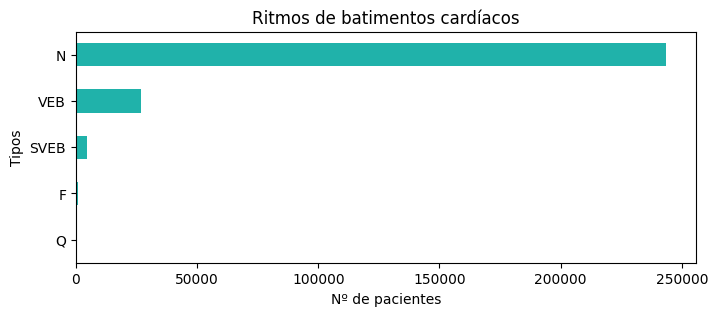

In [20]:
# Analisando graficamente o tipo
plt.figure(figsize = (8,3))
arritmia['type'].value_counts(ascending= True).plot.barh(title='Ritmos de batimentos cardíacos', color='lightseagreen')
plt.xlabel('Nº de pacientes')
plt.ylabel('Tipos');

In [21]:
# Normalizando os dados da coluna tipo
arritmia['type'].replace('N', 0, inplace=True)
arritmia['type'].replace('VEB', 1, inplace=True)
arritmia['type'].replace('SVEB', 1, inplace=True)
arritmia['type'].replace('F', 1, inplace=True)
arritmia['type'].replace('Q', 1, inplace=True)

In [22]:
arritmia.head()

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,0,163,165.0,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,2,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,0,165,166.0,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,5,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,0,166,102.0,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,25,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,1,102,231.0,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,3,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,0,231,165.0,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,34,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [23]:
arritmia.dtypes

type                int64
0_pre-RR            int64
0_post-RR         float64
0_pPeak           float64
0_tPeak           float64
0_rPeak           float64
0_sPeak           float64
0_qPeak           float64
0_qrs_interval      int64
0_pq_interval       int64
0_qt_interval       int64
0_st_interval       int64
0_qrs_morph0      float64
0_qrs_morph1      float64
0_qrs_morph2      float64
0_qrs_morph3      float64
0_qrs_morph4      float64
1_pre-RR            int64
1_post-RR         float64
1_pPeak           float64
1_tPeak           float64
1_rPeak           float64
1_sPeak           float64
1_qPeak           float64
1_qrs_interval      int64
1_pq_interval       int64
1_qt_interval       int64
1_st_interval       int64
1_qrs_morph0      float64
1_qrs_morph1      float64
1_qrs_morph2      float64
1_qrs_morph3      float64
1_qrs_morph4      float64
dtype: object

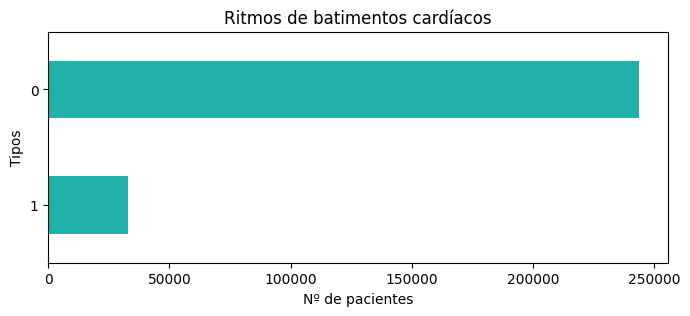

In [24]:
# Analisando graficamente o tipo
plt.figure(figsize = (8,3))
arritmia['type'].value_counts(ascending= True).plot.barh(title='Ritmos de batimentos cardíacos', color='lightseagreen')
plt.xlabel('Nº de pacientes')
plt.ylabel('Tipos');

## 4 - Análise e Exploração dos Dados

A análise e exploração dos dados nos permite examinar e estudar as características dos dados, obter insights,entender suas relações, etc, e todas as análises realizadas nessa seção constam na documentação do projeto.

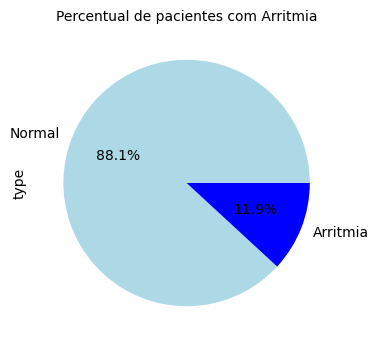

In [25]:
# Análise do percentual de pacientes com Arritmia
plt.figure(figsize = (6,4))
arritmia['type'].value_counts().plot.pie(labels=['Normal','Arritmia'], colors=['lightblue','blue'], autopct='%1.1f%%')
plt.title('Percentual de pacientes com Arritmia', fontsize = 10)
plt.show();

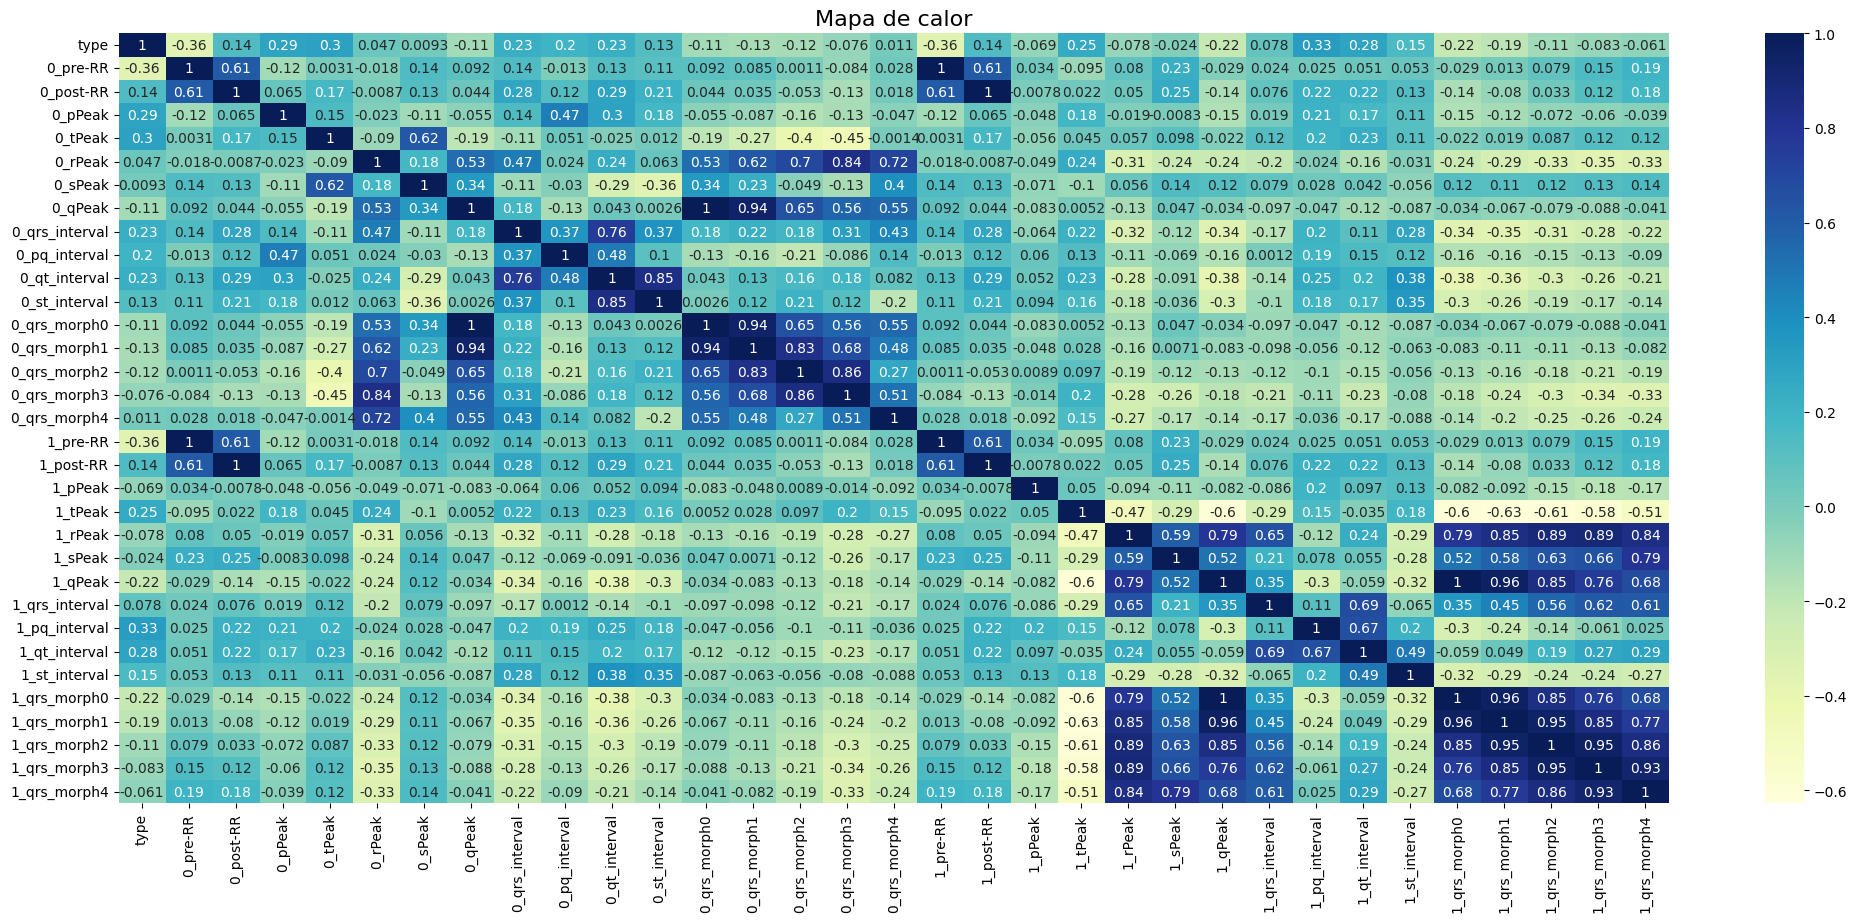

In [26]:
# Analisando as interações das features presentes no exame
plt.figure(figsize = (25,10))
sns.heatmap(arritmia.corr(), annot =True, cmap='YlGnBu')
plt.title('Mapa de calor', fontsize = 16)
plt.show()


### •	Características morfológicas do complexo QRS

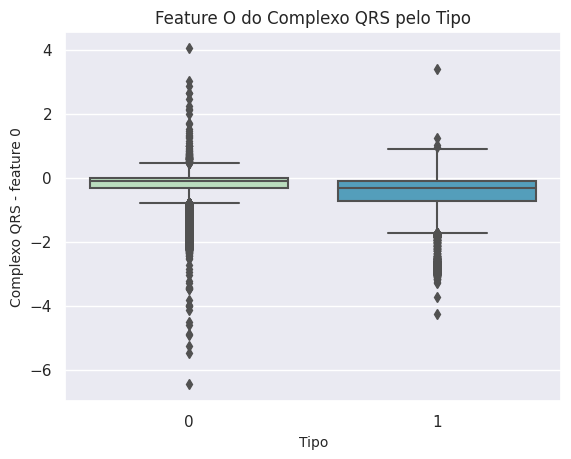

In [27]:
# Análise das caracteríscas morfológicas do complexo QRS pelo tipo
sns.set(style='darkgrid')
sns.boxplot(data=arritmia, x='type', y='1_qrs_morph0', palette='GnBu')
plt.title('Feature O do Complexo QRS pelo Tipo', fontsize=12)
plt.xlabel('Tipo', fontsize=10)
plt.ylabel('Complexo QRS - feature 0', fontsize=10)
plt.show()

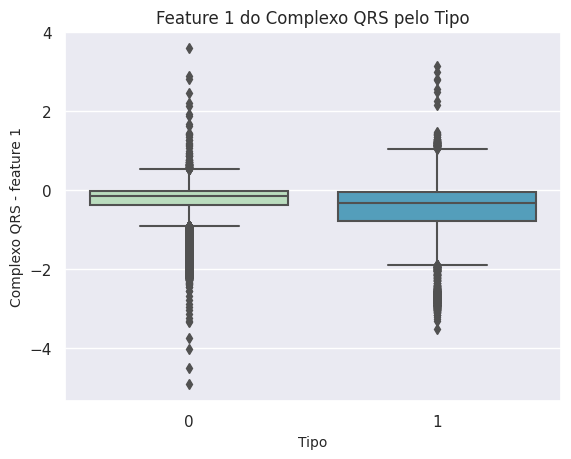

In [28]:
# Análise das caracteríscas morfológicas do complexo QRS pelo tipo
sns.set(style='darkgrid')
sns.boxplot(data=arritmia, x='type', y='1_qrs_morph1', palette='GnBu')
plt.title('Feature 1 do Complexo QRS pelo Tipo', fontsize=12)
plt.xlabel('Tipo', fontsize=10)
plt.ylabel('Complexo QRS - feature 1', fontsize=10)
plt.show()

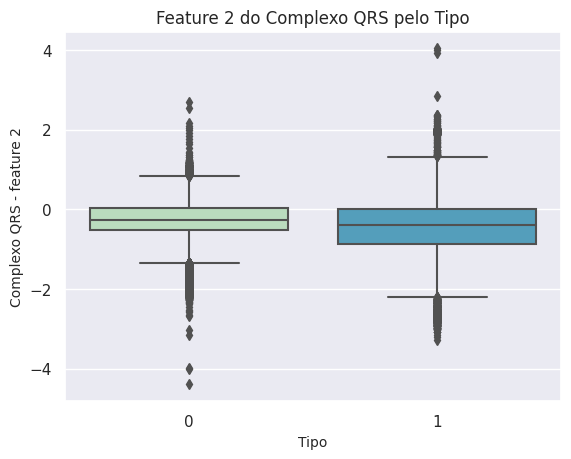

In [29]:
# Análise das caracteríscas morfológicas do complexo QRS pelo tipo
sns.set(style='darkgrid')
sns.boxplot(data=arritmia, x='type', y='1_qrs_morph2', palette='GnBu')
plt.title('Feature 2 do Complexo QRS pelo Tipo', fontsize=12)
plt.xlabel('Tipo', fontsize=10)
plt.ylabel('Complexo QRS - feature 2', fontsize=10)
plt.show()

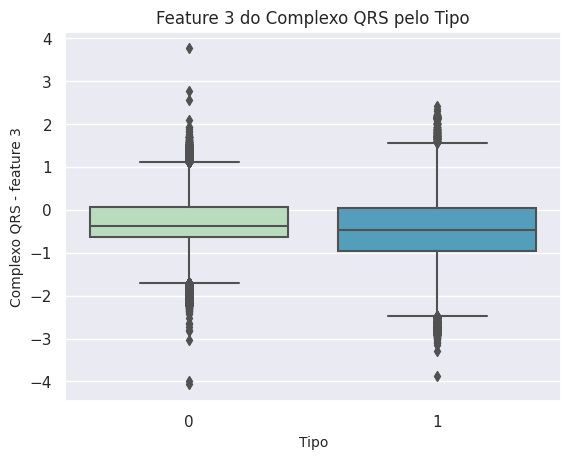

In [30]:
# Análise das caracteríscas morfológicas do complexo QRS pelo tipo
sns.set(style='darkgrid')
sns.boxplot(data=arritmia, x='type', y='1_qrs_morph3', palette='GnBu')
plt.title('Feature 3 do Complexo QRS pelo Tipo', fontsize=12)
plt.xlabel('Tipo', fontsize=10)
plt.ylabel('Complexo QRS - feature 3', fontsize=10)
plt.show()

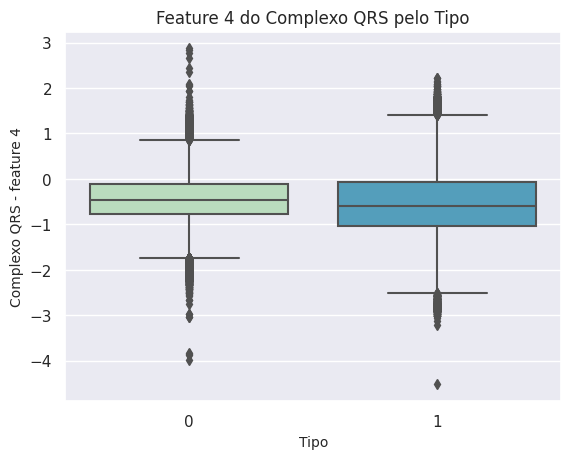

In [31]:
# Análise das caracteríscas morfológicas do complexo QRS pelo tipo
sns.set(style='darkgrid')
sns.boxplot(data=arritmia, x='type', y='1_qrs_morph4', palette='GnBu')
plt.title('Feature 4 do Complexo QRS pelo Tipo', fontsize=12)
plt.xlabel('Tipo', fontsize=10)
plt.ylabel('Complexo QRS - feature 4', fontsize=10)
plt.show()

### •	Picos


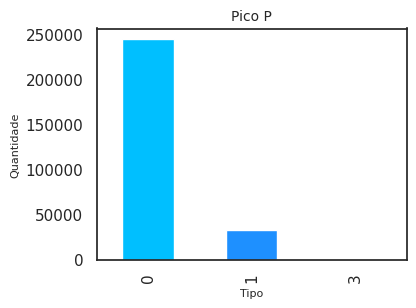

In [32]:
# Análise dos picos pelo tipo
sns.set(style='white')
plt.figure(figsize = (4,3))
arritmia.groupby(['1_pPeak'])['type'].sum().value_counts().sort_values(ascending=False).plot.bar(color= ['deepskyblue',
                                                                                                         'dodgerblue'])
plt.title('Pico P', fontsize = 10)
plt.xlabel('Tipo', fontsize = 8)
plt.ylabel('Quantidade', fontsize = 8);
plt.show()

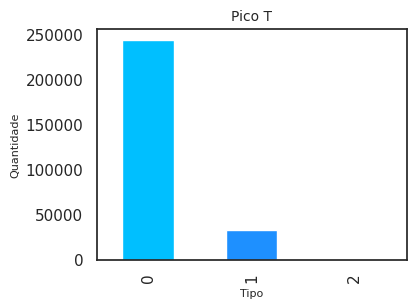

In [33]:
# Análise dos picos pelo tipo
sns.set(style='white')
plt.figure(figsize = (4,3))
arritmia.groupby(['1_tPeak'])['type'].sum().value_counts().sort_values(ascending=False).plot.bar(color= ['deepskyblue',
                                                                                                         'dodgerblue'])
plt.title('Pico T', fontsize = 10)
plt.xlabel('Tipo', fontsize = 8)
plt.ylabel('Quantidade', fontsize = 8);
plt.show()

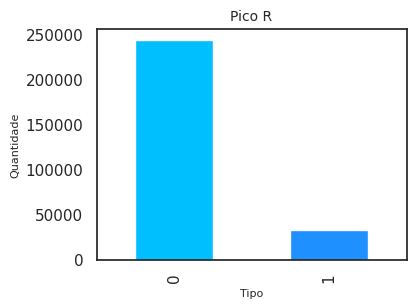

In [34]:
# Análise dos picos pelo tipo
sns.set(style='white')
plt.figure(figsize = (4,3))
arritmia.groupby(['1_rPeak'])['type'].sum().value_counts().sort_values(ascending=False).plot.bar(color= ['deepskyblue',
                                                                                                         'dodgerblue'])
plt.title('Pico R', fontsize = 10)
plt.xlabel('Tipo', fontsize = 8)
plt.ylabel('Quantidade', fontsize = 8);
plt.show()

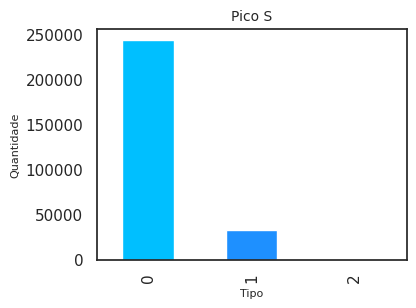

In [35]:
# Análise dos picos pelo tipo
sns.set(style='white')
plt.figure(figsize = (4,3))
arritmia.groupby(['1_sPeak'])['type'].sum().value_counts().sort_values(ascending=False).plot.bar(color= ['deepskyblue',
                                                                                                         'dodgerblue'])
plt.title('Pico S', fontsize = 10)
plt.xlabel('Tipo', fontsize = 8)
plt.ylabel('Quantidade', fontsize = 8);
plt.show()

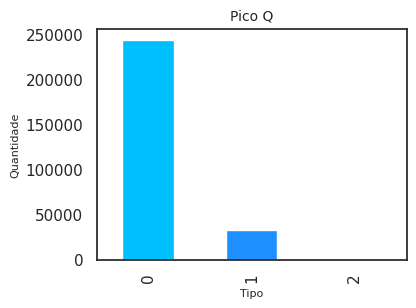

In [36]:
# Análise dos picos pelo tipo
sns.set(style='white')
plt.figure(figsize = (4,3))
arritmia.groupby(['1_qPeak'])['type'].sum().value_counts().sort_values(ascending=False).plot.bar(color= ['deepskyblue',
                                                                                                         'dodgerblue'])
plt.title('Pico Q', fontsize = 10)
plt.xlabel('Tipo', fontsize = 8)
plt.ylabel('Quantidade', fontsize = 8);
plt.show()

In [37]:
# Valores dos picos
p= arritmia.groupby(['1_pPeak'])['type'].sum().value_counts()
t= arritmia.groupby(['1_tPeak'])['type'].sum().value_counts()
r= arritmia.groupby(['1_rPeak'])['type'].sum().value_counts()
s= arritmia.groupby(['1_sPeak'])['type'].sum().value_counts()
q= arritmia.groupby(['1_qPeak'])['type'].sum().value_counts()

In [38]:
# Display comparativo dos picos
raw_data = {'Pico P' : p, 'Pico T' : t, 'Pico R' : r, 'Pico S' : s, 'Pico Q' : q}

df = pd.DataFrame(raw_data, columns = ['Pico P', 'Pico T', 'Pico R', 'Pico S', 'Pico Q'], index = [0,1])
display(df)

,Pico P,Pico T,Pico R,Pico S,Pico Q
0,243556,243602,243616,243618,243597
1,32786,32783,32789,32787,32787


### •	Intervalos

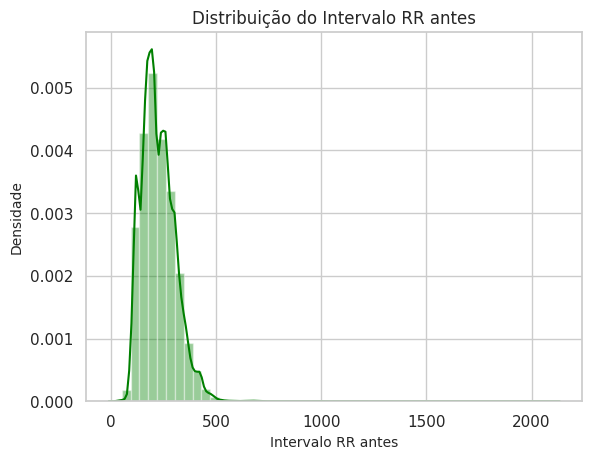

In [39]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_pre-RR'], color ='green')
plt.title('Distribuição do Intervalo RR antes', fontsize = 12)
plt.xlabel('Intervalo RR antes', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

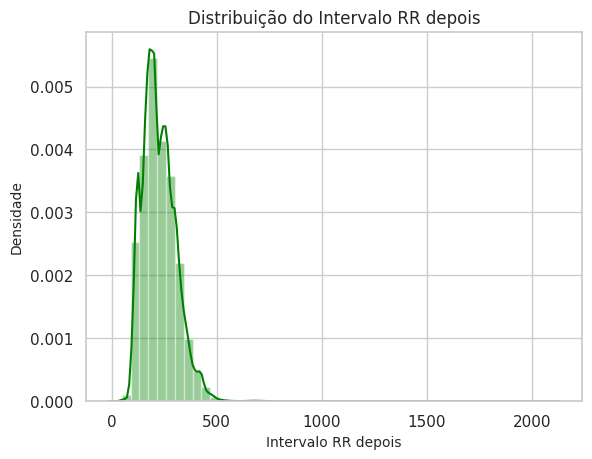

In [40]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_post-RR'], color ='green')
plt.title('Distribuição do Intervalo RR depois', fontsize = 12)
plt.xlabel('Intervalo RR depois', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

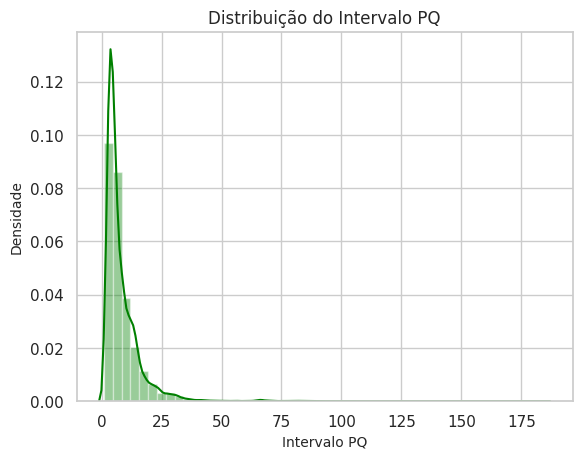

In [41]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_pq_interval'], color ='green')
plt.title('Distribuição do Intervalo PQ', fontsize = 12)
plt.xlabel('Intervalo PQ', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

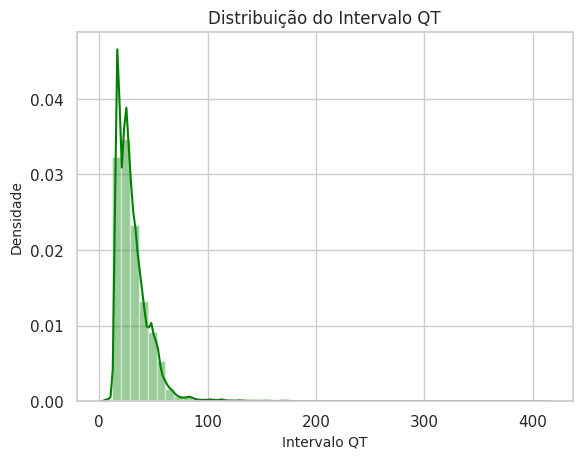

In [42]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_qt_interval'], color ='green')
plt.title('Distribuição do Intervalo QT', fontsize = 12)
plt.xlabel('Intervalo QT', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

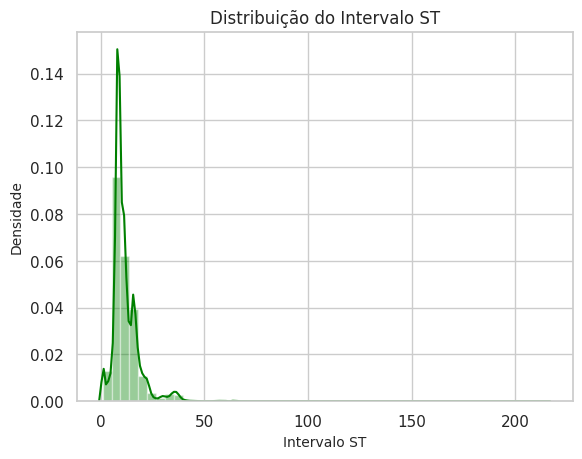

In [43]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_st_interval'], color ='green')
plt.title('Distribuição do Intervalo ST', fontsize = 12)
plt.xlabel('Intervalo ST', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

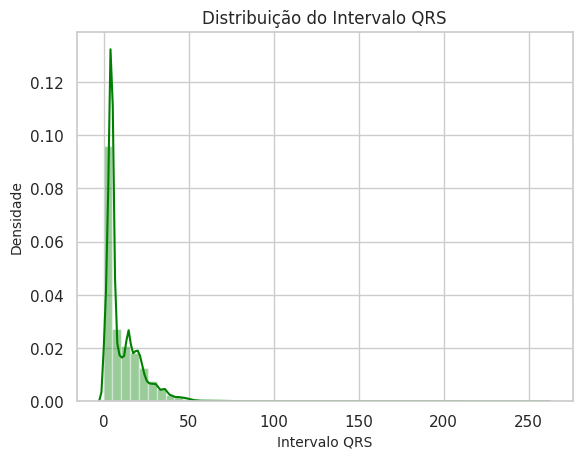

In [44]:
# Análise das distribuições dos intervalos
sns.set(style='whitegrid')
sns.distplot(arritmia['1_qrs_interval'], color ='green')
plt.title('Distribuição do Intervalo QRS', fontsize = 12)
plt.xlabel('Intervalo QRS', fontsize = 10)
plt.ylabel('Densidade', fontsize = 10);
plt.show()

## 5 - Modelos de Machine Learning


Nesse etapa do projeto, os dados serão separados em dados de Treino e de Teste para fazer as análises dos modelos, onde 30% dos dados serão para o treino. A análise de cada modelo se encontra na documentação em pdf do projeto.

In [45]:
# Separação dos Dados de treino e teste
X = arritmia.drop(['type'],axis=1)
y = arritmia['type']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Analisando a separação dos dados de treino
X_train.shape

(193492, 32)

In [47]:
# Analisando a separação dos dados de treino
X_test.shape

(82926, 32)

### 5.1 - Naive Bayes

In [48]:
# Criando o modelo Naive Bayes
def naive_bayes():
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return gnb

In [49]:
# Analisando o Naive Bayes
gnb = naive_bayes()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     73141
           1       0.55      0.66      0.60      9785

    accuracy                           0.90     82926
   macro avg       0.75      0.79      0.77     82926
weighted avg       0.91      0.90      0.90     82926



In [50]:
# Valor da acurácia
gnb_score = gnb.score(X_test,y_test)
gnb_score

0.8973783855485614

### 5.2 - k-Nearest Neighbors

In [51]:
# Criando o modelo k-Nearest Neighbors
def k_nearest_neighbors (n_neighbors):
    knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return knn

In [52]:
# Analisando o k-NN com 5 vizinhos
knn = k_nearest_neighbors(n_neighbors = 5)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     73141
           1       0.94      0.91      0.92      9785

    accuracy                           0.98     82926
   macro avg       0.96      0.95      0.96     82926
weighted avg       0.98      0.98      0.98     82926



In [53]:
# Analisando o k-NN com 15 vizinhos
knn = k_nearest_neighbors(n_neighbors = 15)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     73141
           1       0.94      0.89      0.91      9785

    accuracy                           0.98     82926
   macro avg       0.96      0.94      0.95     82926
weighted avg       0.98      0.98      0.98     82926



In [54]:
# Valor da acurácia
knn_score = knn.score(X_test,y_test)
knn_score

0.9797047970479705

### 5.3 - Support Vector Machine

In [55]:
# Criando o modelo Support Vector Machine
def support_vector_machine(kernel):
    svm = SVC(kernel= kernel, gamma='auto', probability= True)
    svm = svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return svm

In [56]:
# Analisando o kernel Sigmoid
svm = support_vector_machine(kernel='sigmoid')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     73141
           1       0.00      0.00      0.00      9785

    accuracy                           0.88     82926
   macro avg       0.44      0.50      0.47     82926
weighted avg       0.78      0.88      0.83     82926



In [57]:
# Valor da acurácia
svm_score = svm.score(X_test,y_test)
svm_score

0.8820032317970239

### 5.4 - Decision Tree

In [58]:
# Criando o modelo Decision Tree
def decision_tree(max_depth):
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt = dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return dt

In [59]:
# Analisando os resultados com altura máxima = 10
dt = decision_tree(10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     73141
           1       0.95      0.85      0.90      9785

    accuracy                           0.98     82926
   macro avg       0.96      0.92      0.94     82926
weighted avg       0.98      0.98      0.98     82926



In [60]:
# Valor da acurácia
dt_score = dt.score(X_test,y_test)
dt_score

0.9768227094035646

### 5.5 - Random Forest

In [61]:
# Criando o modelo Random Forest
def random_forest (n_estimators):
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return rf

In [62]:
# Analisando o Random Forest com 10 números de árvore
rf = random_forest(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     73141
           1       0.98      0.95      0.97      9785

    accuracy                           0.99     82926
   macro avg       0.99      0.97      0.98     82926
weighted avg       0.99      0.99      0.99     82926



In [63]:
# Valor da acurácia
rf_score = rf.score(X_test,y_test)
rf_score

0.9924631599257169

### 5.6 - Gradient Tree Boosting

In [64]:
# Criando o modelo Gradient Tree Boosting
def gradient_tree_boosting(n_estimators):
    gtb = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    gtb = gtb.fit(X_train, y_train)
    y_pred = gtb.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return gtb

In [65]:
# Analisando o Gradient Tree Boosting com 10 números de iterações
gtb = gradient_tree_boosting(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     73141
           1       0.93      0.57      0.71      9785

    accuracy                           0.94     82926
   macro avg       0.94      0.78      0.84     82926
weighted avg       0.94      0.94      0.94     82926



In [66]:
# Valor da acurácia
gtb_score = gtb.score(X_test,y_test)
gtb_score

0.9442876781708993

### 5.7 - AdaBoost

In [67]:
# Criando o modelo AdaBoost
def ada_boost():
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return ada

In [68]:
# Analisando o AdaBoost
ada = ada_boost()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     73141
           1       0.93      0.83      0.88      9785

    accuracy                           0.97     82926
   macro avg       0.96      0.91      0.93     82926
weighted avg       0.97      0.97      0.97     82926



In [69]:
# Valor da acurácia
ada_score = ada.score(X_test,y_test)
ada_score

0.9726623736825604

### 5.8 - Bagging Classifier

In [70]:
# Criando o modelo Bagging Classifier
def bagging_classifier():
    bgg = BaggingClassifier()
    bgg.fit(X_train, y_train)
    y_pred = bgg.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return bgg


In [71]:
# Analisando o Bagging Classifier
bgg = bagging_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     73141
           1       0.98      0.95      0.96      9785

    accuracy                           0.99     82926
   macro avg       0.98      0.97      0.98     82926
weighted avg       0.99      0.99      0.99     82926



In [72]:
# Valor da acurácia
bgg_score = bgg.score(X_test,y_test)
bgg_score

0.9909075561343849

### 5.9 - XGBoost Classifier

In [73]:
# Criando o modelo XGBoost Classifier
def xgb_classifier():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return xgb

In [74]:
# Analisando o XGBoost Classifier
xgb = xgb_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73141
           1       0.98      0.97      0.98      9785

    accuracy                           0.99     82926
   macro avg       0.99      0.98      0.99     82926
weighted avg       0.99      0.99      0.99     82926



In [75]:
# Valor da acurácia
xgb_score = xgb.score(X_test,y_test)
xgb_score


0.9944408267612088

### 5.10 - LightGBM Classifier

In [76]:
# Criando o modelo LightGBM Classifier
def lgbm_classifier():
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred))

    return lgbm

In [77]:
# Analisando o LightGBM Classifier
lgbm = lgbm_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     73141
           1       0.98      0.96      0.97      9785

    accuracy                           0.99     82926
   macro avg       0.99      0.98      0.98     82926
weighted avg       0.99      0.99      0.99     82926



In [78]:
# Valor da acurácia
lgbm_score = lgbm.score(X_test,y_test)
lgbm_score

0.9924511009815981

## 6 - Interpretação dos Resultados

Para a interpretação do resultado contou-se com o auxílio das curvas ROC e AUC, e da ferramenta de visualização SHAP. Toda a explicação encontra-se na documentação do projeto.

### Curva ROC e AUC

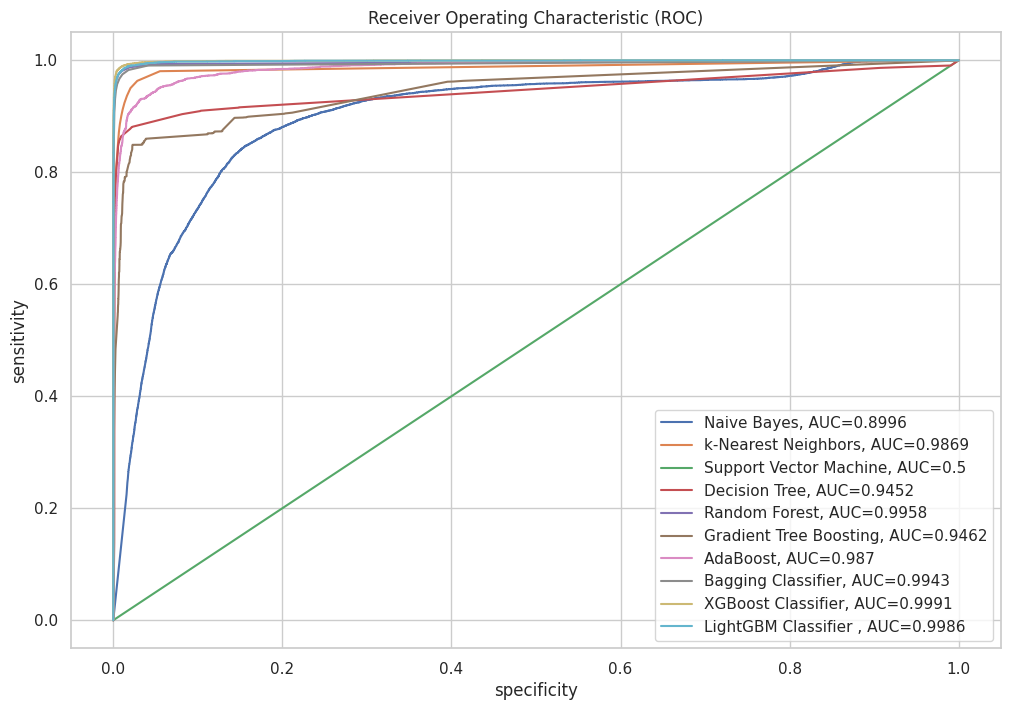

In [80]:
# Plotando a curva ROC para todos os modelos para realizar a interpretação dos resultados:

plt.figure(0).clf()
plt.rcParams['figure.figsize'] = (12,8)

plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('sensitivity')
plt.xlabel('specificity')


# Curva ROC para o modelo Naive Bayes
y_pred = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Naive Bayes, AUC='+str(auc))

# Curva ROC para o modelo k-Nearest Neighbors
y_pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='k-Nearest Neighbors, AUC='+str(auc))

# Curva ROC para o modelo Support Vector Machine
y_pred = svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Support Vector Machine, AUC='+str(auc))

# Curva ROC para o modelo Decision Tree
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Decision Tree, AUC='+str(auc))

# Curva ROC para o modelo Random Forest
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Random Forest, AUC='+str(auc))

# Curva ROC para o modelo Gradient Tree Boosting
y_pred = gtb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Gradient Tree Boosting, AUC='+str(auc))

# Curva ROC para o modelo AdaBoost
y_pred = ada.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='AdaBoost, AUC='+str(auc))

# Curva ROC para o modelo Bagging Classifier
y_pred = bgg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Bagging Classifier, AUC='+str(auc))

# Curva ROC para o modelo XGBoost Classifier
y_pred = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='XGBoost Classifier, AUC='+str(auc))

# Curva ROC para o modelo LightGBM Classifier
y_pred = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='LightGBM Classifier , AUC='+str(auc))


plt.legend()
plt.show()



Resultados por ordem de melhor desempenho:
*   XGBoost Classifier = 99.91%
*   LightGBM Classifier = 99.86%
*   Random Forest = 99.58%
*   Bagging Classifier = 99.43%
*   AdaBoost = 98.70%
*   K-Nearest Neighbors = 98.69%
*   Gradient Tree Boosting = 94.62%
*   Decision Tree = 94.52%
*   Naive Bayes = 89.96%
*   Support Vector Machine = 50%



### SHAP

Para realizar a explicação utilizando o SHAP será considerado o modelo XGBoost Classifier que possui a melhor performance e foi o escolhido pelo seu melhor desempenho conforme análise da curva ROC e valores AUC.

In [85]:
# Plotando o SHAP para análise
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

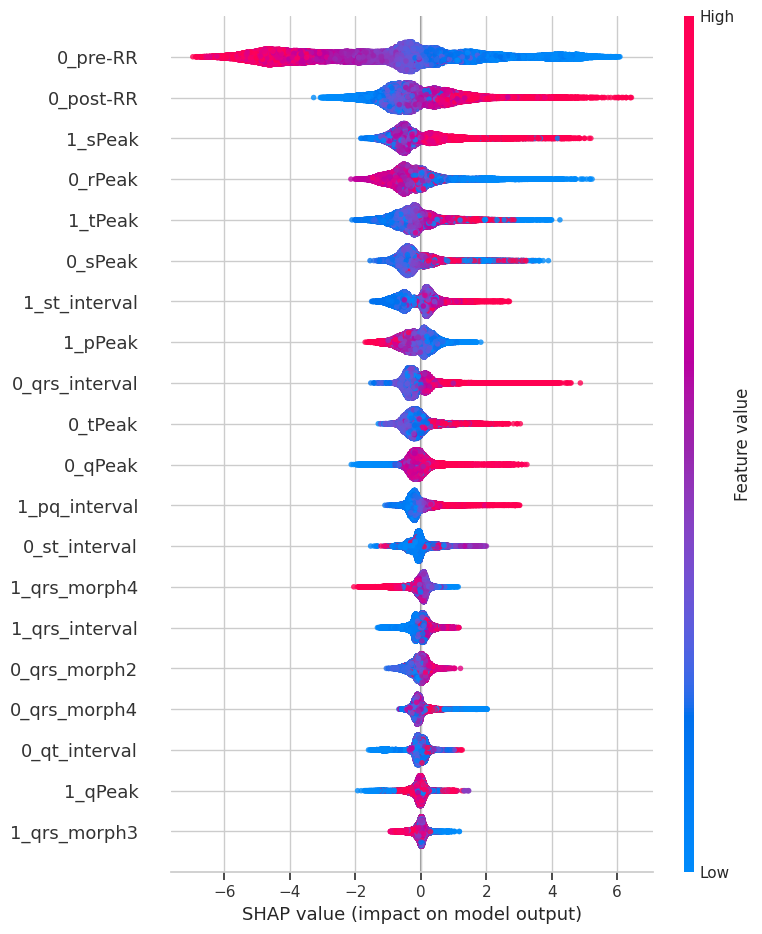

In [90]:
shap.summary_plot(shap_values, X_test, alpha=0.8)

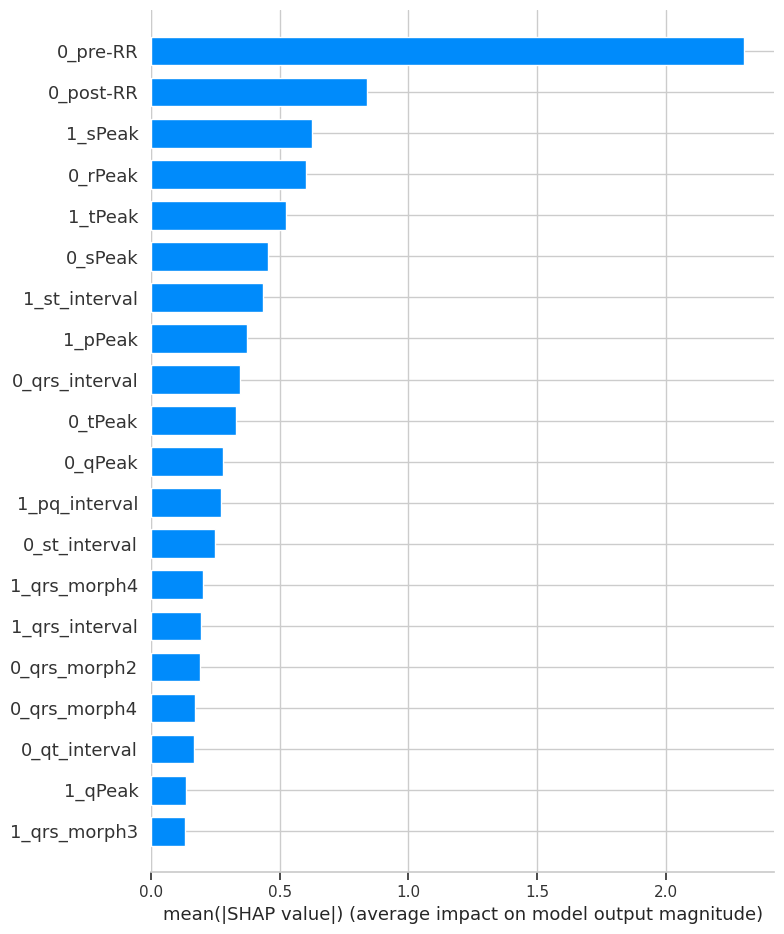

In [91]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

O intervalo RR foi a feature mais importante na classificação do modelo. E após essa determinação o SHAP foi utilizado para analisar a dependência deste intervalo.

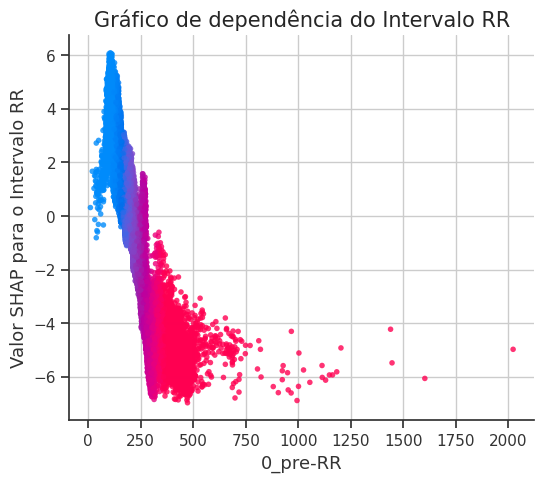

In [93]:
# Gráfico de dependência do Intervalo RR
shap.dependence_plot('0_pre-RR', shap_values, X_test, interaction_index='0_pre-RR', alpha=0.8,show=False)
plt.title('Gráfico de dependência do Intervalo RR',fontsize=15)
plt.ylabel('Valor SHAP para o Intervalo RR')
plt.show()

## 7 - Apresentação dos Resultados

A performance geral do modelo de machine learning em uma análise de classificação, determinada pela acurácia, foi representada pela tabela criada abaixo.

In [107]:
# Display comparativo dos picos
raw_data = {'Naive Bayes' : gnb_score, 'k-Nearest Neighbors' : knn_score, 'Support Vector Machine' : svm_score,
            'Decision Tree' : dt_score, 'Random Forest' : rf_score, 'Gradient Tree Boosting' : gtb_score,
            'AdaBoost' : ada_score, 'Bagging Classifier' : bgg_score, 'XGBoost Classifier' : xgb_score,
            'LightGBM Classifier' : lgbm_score}

df = pd.DataFrame(raw_data, columns = ['Naive Bayes', 'k-Nearest Neighbors', 'Support Vector Machine',
            'Decision Tree', 'Random Forest', 'Gradient Tree Boosting',
            'AdaBoost', 'Bagging Classifier', 'XGBoost Classifier',
            'LightGBM Classifier'], index = ['Acurácia'],)
display(df)

,Naive Bayes,k-Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Gradient Tree Boosting,AdaBoost,Bagging Classifier,XGBoost Classifier,LightGBM Classifier
Acurácia,0.897378,0.979705,0.882003,0.976823,0.992463,0.944288,0.972662,0.990908,0.994441,0.992451


Além da análise da acurácia, precisão e recall, foi utilizado a curva ROC e os valores AUC para análise e determinação do melhor modelo, e foi determinado que o XGBoost Classifier foi o melhor com 99.91%.

Em seguida foi utilizado o SHAP para visualizar a contribuição de cada feature e determinar a mais relevante, que foi o intervalo RR.

A apresentação inspirada no modelo de Dorard encontra-se na parte documental do projeto.